In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format='retina'

hfont = {'size':20}

In [2]:
filters = np.load("filters.npy")
reconstructions = np.load("reconstructions.npy")
input_frames = np.load("input_frames.npy")
v_out = np.load("mem_potential.npy")
W_out = np.load("W_out.npy")
#output_frames = np.load("output_frames.npy")

# Filters

In [3]:
print(filters.shape)
filters = np.squeeze(filters)
filters = np.rollaxis(filters,0,1)
filters = np.reshape(filters,[-1,20,20])

(400, 128)


In [1148]:
filters.shape

(128, 20, 20)

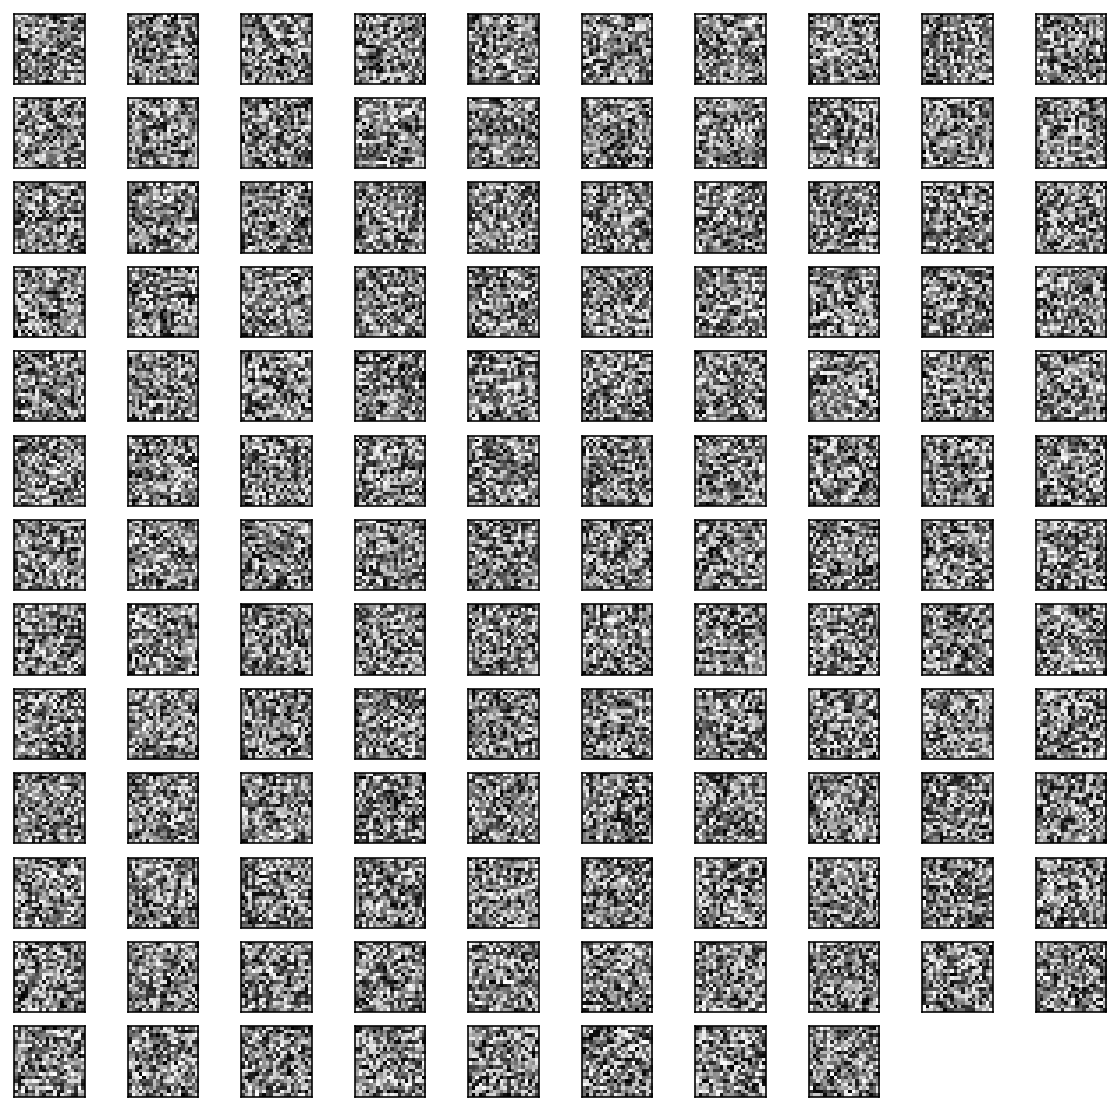

In [1149]:
height = filters.shape[1]
width = filters.shape[2]
num_filters = filters.shape[0]
filters = np.squeeze(filters)

fig = plt.figure(figsize=(10,100))
for i in range(int(num_filters)):
    image = plt.subplot(int(num_filters+1),10,i+1)
    plt.imshow(filters[i,...])
    #plt.imshow(filters[i,...], cmap = 'seismic')
    plt.gray()
    image.get_xaxis().set_visible(False)
    image.get_yaxis().set_visible(False)

In [1150]:
reconstructions.shape

(100, 400)

In [1151]:
print(W_out.shape)
W_out = np.squeeze(W_out)
W_out = np.reshape(W_out,[-1,20,20])

(128, 400)


In [1152]:
W_out.shape

(128, 20, 20)

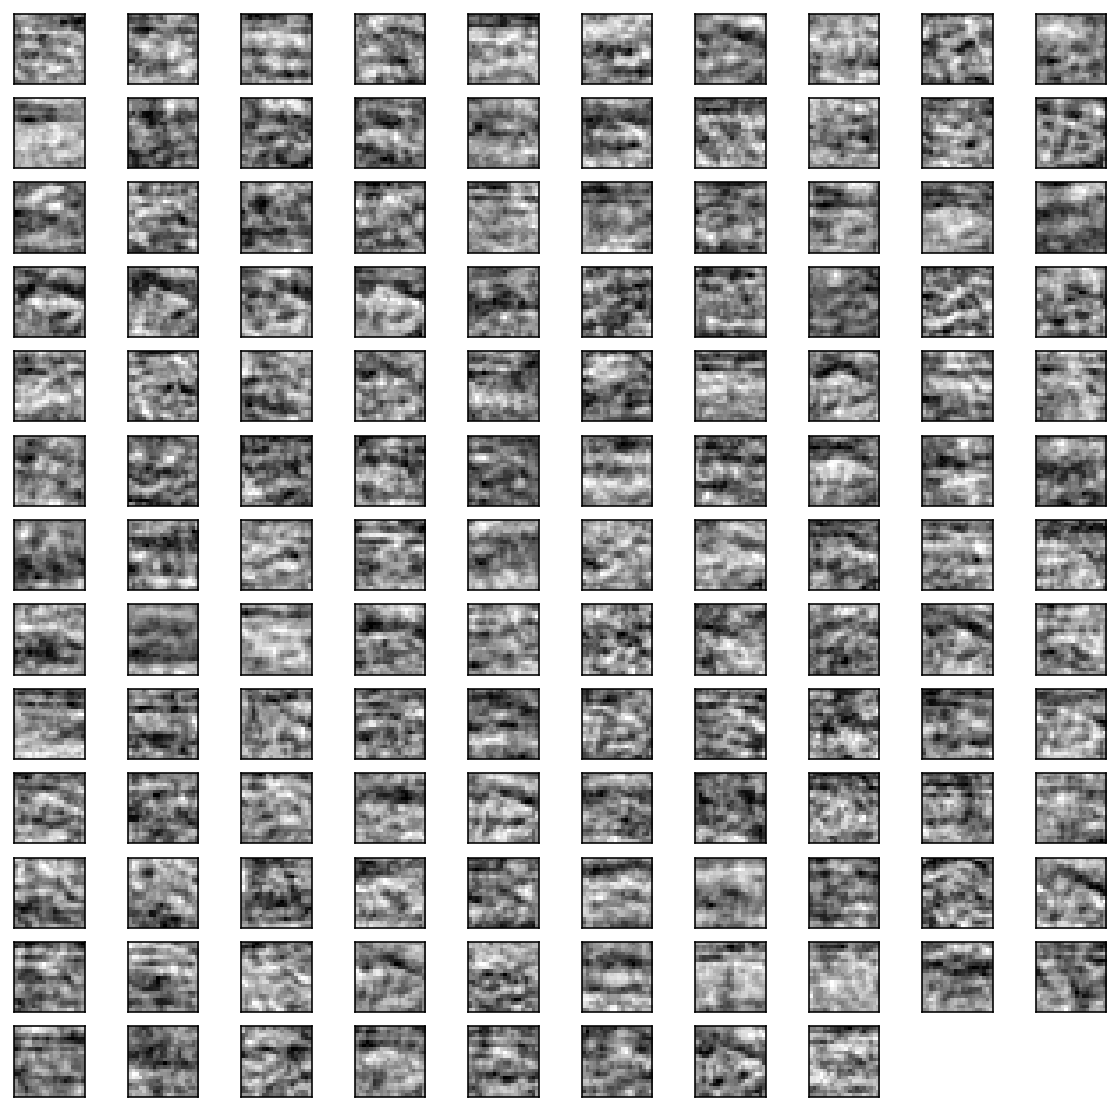

In [1153]:
fig = plt.figure(figsize=(10,100))
for i in range(int(num_filters)):
    image = plt.subplot(int(num_filters+1),10,i+1)
    plt.imshow(W_out[i,...])
    #plt.imshow(filters[i,...], cmap = 'seismic')
    plt.gray()
    image.get_xaxis().set_visible(False)
    image.get_yaxis().set_visible(False)

# Reconstruction

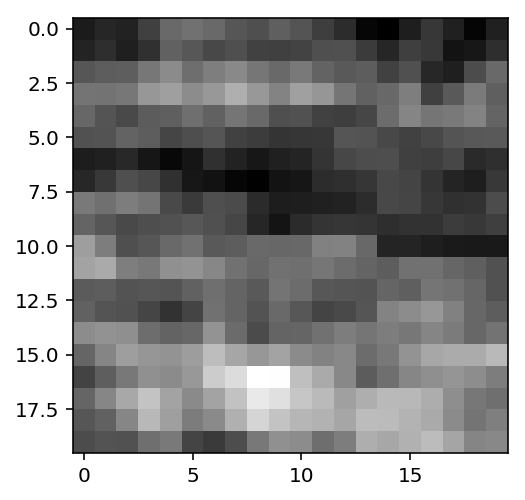

In [1154]:
plt.imshow(reconstructions[1].reshape(20,20))
plt.gray()

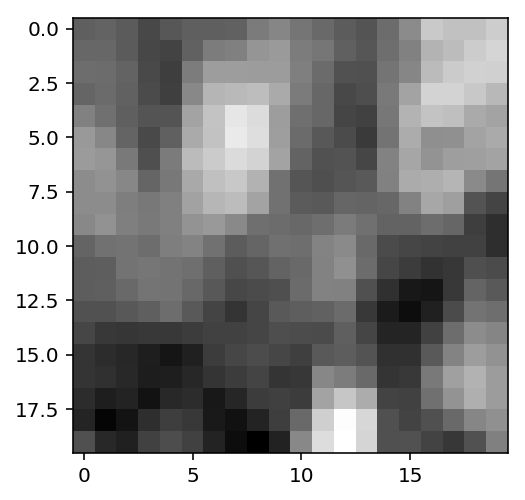

In [1155]:
plt.imshow(input_frames[1].reshape(20,20))
plt.gray()

In [1156]:
input_frames.shape

(100, 400)

# Raster plot

In [1157]:
v_out.shape

(20, 49, 100, 128)

In [1158]:
np.max(v_out)

35.0

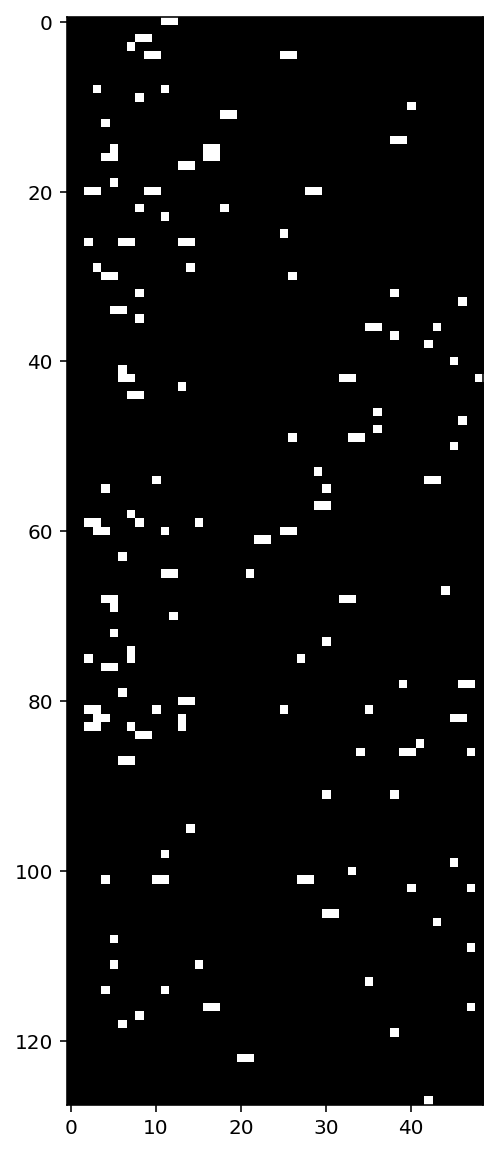

In [5]:
fig, ax1 = plt.subplots(figsize=(5,10))
ax1.imshow((v_out[0,:,7,:] > 0).T, cmap='gray')

# Spiking responses of a subset of the neurons

In [139]:
from matplotlib.offsetbox import AnchoredOffsetbox
class AnchoredScaleBar(AnchoredOffsetbox):
    def __init__(self, transform, sizex=0, sizey=0, labelx=None, labely=None, loc=4,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, barcolor="gray", barwidth=0.5, 
                 **kwargs):
        """
        Draw a horizontal and/or vertical  bar with the size in data coordinate
        of the give axes. A label will be drawn underneath (center-aligned).
        - transform : the coordinate frame (typically axes.transData)
        - sizex,sizey : width of x,y bar, in data units. 0 to omit
        - labelx,labely : labels for x,y bars; None to omit
        - loc : position in containing axes
        - pad, borderpad : padding, in fraction of the legend font size (or prop)
        - sep : separation between labels and bars in points.
        - **kwargs : additional arguments passed to base class constructor
        """
        from matplotlib.patches import Rectangle
        from matplotlib.offsetbox import AuxTransformBox, VPacker, HPacker, TextArea, DrawingArea
        bars = AuxTransformBox(transform)
        if sizex:
            bars.add_artist(Rectangle((0,0), sizex, 0, ec=barcolor, lw=barwidth, fc="none"))
        if sizey:
            bars.add_artist(Rectangle((0,0), 0, sizey, ec=barcolor, lw=barwidth, fc="none"))

        if sizex and labelx:
            self.xlabel = TextArea(labelx, minimumdescent=False)
            bars = VPacker(children=[bars, self.xlabel], align="center", pad=0, sep=sep)
        if sizey and labely:
            self.ylabel = TextArea(labely)
            bars = HPacker(children=[self.ylabel, bars], align="center", pad=0, sep=sep)

        AnchoredOffsetbox.__init__(self, loc, pad=pad, borderpad=borderpad,
                                   child=bars, prop=prop, frameon=False, **kwargs)

        
def add_scalebar(ax, matchx=True, matchy=True, hidex=True, hidey=True, **kwargs):
    """ Add scalebars to axes
    Adds a set of scale bars to *ax*, matching the size to the ticks of the plot
    and optionally hiding the x and y axes
    - ax : the axis to attach ticks to
    - matchx,matchy : if True, set size of scale bars to spacing between ticks
                    if False, size should be set using sizex and sizey params
    - hidex,hidey : if True, hide x-axis and y-axis of parent
    - **kwargs : additional arguments passed to AnchoredScaleBars
    Returns created scalebar object
    """
    def f(axis):
        l = axis.get_majorticklocs()
        return len(l)>1 and (l[1] - l[0])
    
    if matchx:
        kwargs['sizex'] = f(ax.xaxis)
        kwargs['labelx'] = str(kwargs['sizex'])
    if matchy:
        kwargs['sizey'] = f(ax.yaxis)
        kwargs['labely'] = str(kwargs['sizey'])
        
    sb = AnchoredScaleBar(ax.transData, **kwargs)
    ax.add_artist(sb)

    if hidex : ax.xaxis.set_visible(False)
    if hidey : ax.yaxis.set_visible(False)
    if hidex and hidey: ax.set_frame_on(False)
        
    return sb

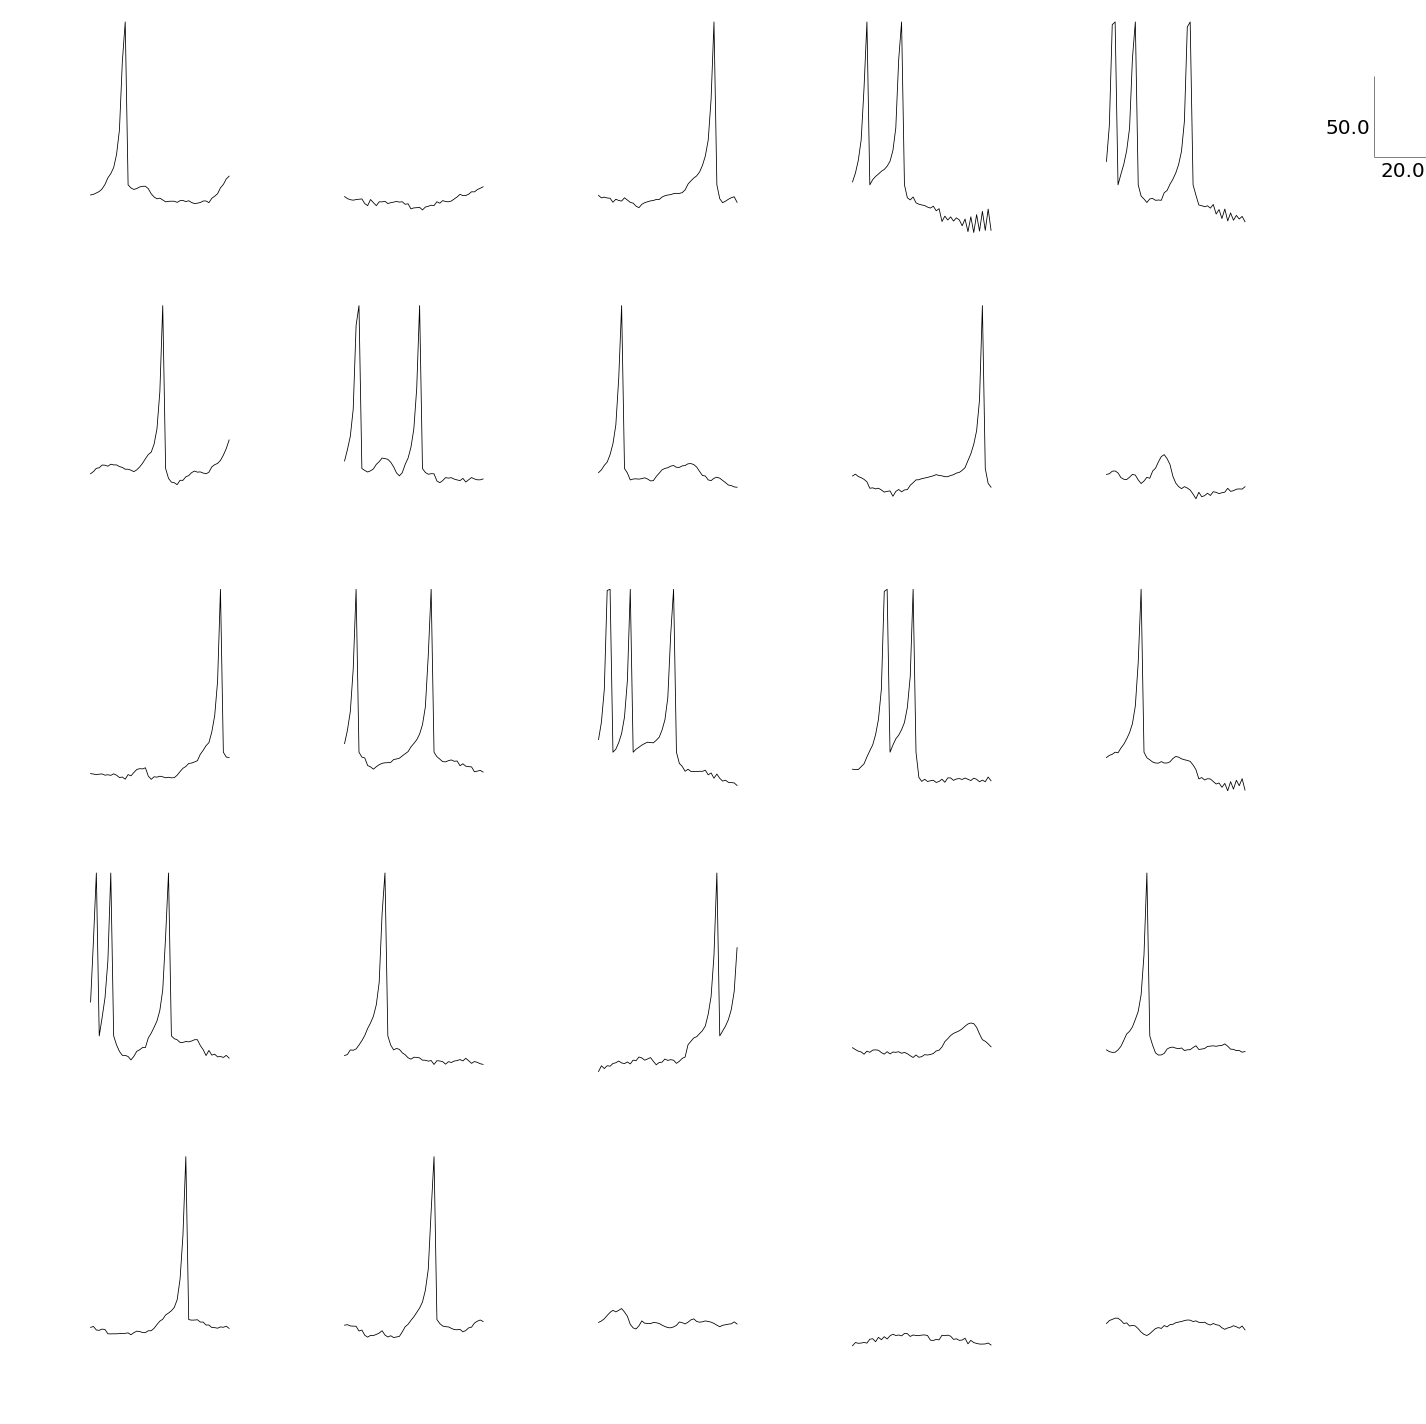

In [165]:
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(10,10))

for i in range(25):
    
    row = int(np.floor(i / 5))
    col = int(i % 5)
    
    
    
    axes[row, col].plot(v_out[0,:,7,5*i], color='k', linewidth=0.4)
    axes[row, col].set_ylim([-100, 40])
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)
    axes[row, col].axis('off')
    
    if row == 0 and col == 4:
        sb = add_scalebar(axes[row, col],sizex=10, sizey=10, labelx='s', labely='mV',loc=7, pad=-1, borderpad=-8)
    
    
    plt.tight_layout()